# Model training, validation then test

This notebook covers all the process from training to validation and test.

Before executing it, make sure the dataset is locally ready (run the dataset_loading.ipynb).

# Training

### YOLOv8 objects detection models

| Model       | Size (pixels) | mAP val 50-95 | Speed (CPU ONNX ms) | Speed (A100 TensorRT ms) | Params (M) | FLOPs (B) |
|-------------|---------------|---------------|---------------------|--------------------------|------------|-----------|
| YOLOv8n     | 640           | 37.3          | 80.4                | 0.99                     | 3.2        | 8.7       |
| YOLOv8s     | 640           | 44.9          | 128.4               | 1.20                     | 11.2       | 28.6      |
| YOLOv8m     | 640           | 50.2          | 234.7               | 1.83                     | 25.9       | 78.9      |
| YOLOv8l     | 640           | 52.9          | 375.2               | 2.39                     | 43.7       | 165.2     |
| YOLOv8x     | 640           | 53.9          | 479.1               | 3.53                     | 68.2       | 257.8     |


Note: 
> I had to use numpy==1.26.4 instead of 2.0.0 so that yolo works properly.

## Model loading

In [1]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")

model.info()

YOLOv8m summary: 295 layers, 25,902,640 parameters, 0 gradients, 79.3 GFLOPs


(295, 25902640, 0, 79.3204224)

# Model training

In [2]:
training_results = model.train(data="football_dataset.yaml", epochs=250, imgsz=720, device=0, patience=50, cache=True, verbose=False)

New https://pypi.org/project/ultralytics/8.2.77 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=football_dataset.yaml, epochs=250, time=None, patience=50, batch=16, imgsz=720, save=True, save_period=-1, cache=True, device=0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False,

/mnt/c/Users/Malo/.yolo/lib/python3.10/site-packages/ultralytics/engine/trainer.py:269: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /home/malo/notebooks/football-player-detection-with-yolo-fine-
train: Caching images (0.7GB RAM): 100%|██████████| 859/859 [00:00<00:00, 1885
val: Scanning /home/malo/notebooks/football-player-detection-with-yolo-fine-tu
val: Caching images (0.2GB RAM): 100%|██████████| 243/243 [00:00<00:00, 754.77


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 736 train, 736 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      8.93G       1.19     0.8637     0.8944        402        736:
                 Class     Images  Instances      Box(P          R      mAP50 


                   all        243       4513      0.757      0.556      0.568      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      8.98G      1.148     0.6024     0.8783        482        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.712      0.532      0.531      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      9.16G      1.112     0.6055     0.8817        339        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.839      0.582      0.627      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      9.13G      1.172     0.6082     0.8875        394        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.711      0.582      0.596      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      8.98G       1.12     0.5755      0.882        433        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.827      0.622      0.655      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      8.94G      1.059     0.5338     0.8595        391        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.749      0.627      0.647      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      8.89G      1.034     0.5078     0.8613        454        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.766      0.624      0.653      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      8.89G      1.028     0.5131     0.8565        437        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.771      0.639      0.649      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      9.06G     0.9946     0.5141     0.8538        344        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.825      0.636      0.658      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      9.13G     0.9725     0.4842     0.8512        307        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.859      0.611      0.658      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250         9G      0.981      0.498     0.8549        449        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.76      0.626      0.658      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      8.92G       1.01     0.5018     0.8532        389        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.845      0.609      0.657      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250       8.9G     0.9914      0.494      0.851        409        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.859      0.628      0.665      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      8.82G     0.9578     0.4746     0.8465        335        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.845      0.647      0.674      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      8.93G     0.9278     0.4585     0.8423        290        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.748      0.649      0.661      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      8.97G     0.9344     0.4673     0.8473        457        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.85      0.637      0.674      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      8.98G     0.9246     0.4592     0.8427        337        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.832      0.637      0.679      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      8.88G     0.9501     0.4696      0.844        331        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.871      0.646      0.697       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      8.94G     0.9225      0.459     0.8406        341        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.855      0.642       0.68      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      8.88G     0.9219      0.457     0.8419        435        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.876      0.659      0.693      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      8.97G     0.8831     0.4369     0.8345        358        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.874      0.653      0.686      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      8.84G     0.8837     0.4321     0.8329        476        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.868      0.637      0.668      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      8.89G      0.871     0.4258     0.8306        426        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.857       0.66        0.7       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      9.01G     0.8653     0.4243     0.8328        432        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.898      0.657      0.691       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      8.95G     0.8513     0.4245     0.8295        482        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.881      0.653      0.691      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      8.92G      0.855     0.4225     0.8302        515        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.878       0.66      0.699      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      8.87G     0.8633     0.4248     0.8356        326        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.856      0.669      0.699      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250       9.1G     0.8411     0.4162     0.8304        307        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.847      0.665      0.691      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      9.16G     0.8434     0.4133     0.8275        475        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.882      0.656      0.691      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      8.83G     0.9071     0.4362     0.8359        322        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.827      0.666      0.699      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      9.01G     0.8378     0.4137     0.8284        388        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.894      0.648      0.705      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      8.87G     0.8349     0.4187     0.8308        379        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.843      0.653      0.682      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      8.93G     0.8279     0.4166     0.8291        387        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.839      0.656      0.692      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      8.85G     0.8229     0.4083     0.8283        366        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.824      0.652      0.688      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      8.93G     0.8234     0.4029     0.8252        427        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.853      0.657      0.698      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      8.89G     0.8055     0.3952     0.8258        363        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.834      0.686      0.702      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      9.15G     0.7745     0.3892     0.8246        319        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.897      0.657      0.702      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      8.91G     0.7934     0.3957     0.8232        341        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.904      0.664      0.712      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      8.89G      0.793      0.394     0.8212        312        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.915      0.653      0.707      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      8.94G     0.7614     0.3777     0.8167        429        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.878      0.674      0.706      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      8.92G     0.7889     0.3922     0.8242        341        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.893      0.676      0.725      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      8.91G     0.7747     0.3861      0.822        406        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.86      0.678      0.728      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250         9G      0.753      0.381     0.8198        432        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.859      0.665       0.71      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      8.86G     0.7754     0.3873     0.8201        368        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.836      0.667      0.692       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      9.03G      0.759     0.3817     0.8165        366        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.889      0.666      0.708       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250       8.9G     0.7578       0.38     0.8185        340        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.833      0.677      0.703      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      8.88G     0.7281     0.3687     0.8129        349        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.887      0.656       0.71      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      8.95G     0.7261     0.3635     0.8165        324        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.893      0.667       0.72       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      8.89G     0.7309     0.3628     0.8152        469        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.882      0.677      0.716      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      9.03G     0.7222      0.363     0.8141        279        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.847      0.677      0.711      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      8.87G     0.7408     0.3723     0.8159        298        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.867      0.671      0.704       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      8.89G     0.7469     0.3699     0.8159        287        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.858       0.68      0.719      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      8.93G     0.7327     0.3644     0.8152        445        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.85      0.679      0.723      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      8.99G     0.7142     0.3619     0.8151        371        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.89      0.676      0.719      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      8.93G     0.7059     0.3582     0.8128        258        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.877      0.667       0.71      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      8.95G     0.7002     0.3531     0.8094        326        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.861      0.677      0.721      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      8.99G      0.698     0.3513     0.8101        247        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.89      0.667      0.709      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      9.07G     0.7346       0.37     0.8147        334        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.865      0.662      0.701      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      8.89G     0.6896     0.3565     0.8125        441        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.868      0.673      0.709      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      8.83G     0.7074     0.3604     0.8116        447        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.832      0.661      0.695      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      8.89G     0.7274     0.3649     0.8136        452        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.83      0.689      0.723      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      8.94G     0.7131     0.3607     0.8154        437        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.861      0.668      0.714      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      8.93G     0.6772     0.3468     0.8096        298        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.913      0.662      0.712       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      8.89G      0.655     0.3347     0.8044        381        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.889       0.67      0.729      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      9.01G     0.6534     0.3371     0.8074        511        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.862      0.676      0.725      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250       8.9G     0.6746     0.3473     0.8097        300        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.839      0.663      0.713      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      8.99G     0.6651     0.3463     0.8083        353        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.914      0.653      0.711       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      8.93G     0.6684     0.3489     0.8068        363        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.937      0.651      0.709      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250       8.9G     0.6654      0.344     0.8051        300        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.886      0.676      0.743      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250         9G     0.6363     0.3308     0.8042        255        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.897      0.676      0.728      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250       8.9G     0.6342     0.3331     0.8054        412        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.881      0.677      0.725      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      8.84G     0.6315     0.3267     0.8047        366        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.885      0.688      0.735      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      8.86G     0.6239      0.323     0.8045        369        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.873      0.692      0.734      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      8.89G      0.623     0.3276     0.8026        370        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.914      0.676      0.737      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250       8.9G     0.6239     0.3295     0.8048        389        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.858      0.679      0.714      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      8.93G     0.6132     0.3239     0.8041        336        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.885      0.681       0.73      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      8.96G     0.6195     0.3252     0.8051        388        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.839      0.673      0.728      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      8.88G     0.6177     0.3265     0.8031        360        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.884      0.657       0.72      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      9.04G     0.6401     0.3326     0.8044        345        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.901       0.68      0.748      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      8.97G     0.5971      0.315     0.8015        300        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.889      0.678      0.741      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      8.93G     0.5901     0.3126     0.8006        313        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.88      0.673      0.724       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      8.96G     0.5973     0.3172     0.8001        347        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.866      0.671      0.724      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      8.94G      0.591     0.3165     0.8011        383        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.819      0.703      0.731      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      8.93G      0.606     0.3202     0.8026        352        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.857      0.661      0.731      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      8.99G     0.5975     0.3192     0.8014        364        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.839      0.665      0.716      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      8.87G     0.5963     0.3121     0.8013        338        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.883      0.688      0.732      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250       8.9G     0.5952     0.3136     0.8017        436        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.889      0.664      0.719      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      8.94G     0.5809      0.308     0.7987        328        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.875      0.674      0.727       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250       8.9G      0.584     0.3055     0.7958        365        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.862      0.679      0.736      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      9.08G     0.5677     0.3029     0.7993        352        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.877      0.682      0.742      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      8.92G     0.5624     0.2967     0.7968        326        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.871      0.692      0.737      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      8.93G     0.5516     0.2946     0.7973        289        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.874      0.683      0.735      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      9.03G     0.5573     0.2954     0.7982        254        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.85      0.685      0.743      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      8.97G       0.57     0.3023      0.797        335        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.879      0.684      0.746      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      8.96G     0.5671     0.3038     0.7991        346        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.862      0.684      0.741      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      8.89G     0.5639     0.3024     0.7984        361        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.879      0.688      0.744      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      8.98G     0.5457     0.2941     0.7952        373        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.89      0.664      0.729      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      8.96G      0.556     0.2992     0.7954        223        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.843      0.684      0.723      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      8.97G     0.5697      0.303     0.7976        305        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.851       0.68      0.728      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250       8.9G     0.5642     0.3002     0.7978        337        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.927      0.672      0.737      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      8.89G     0.5465     0.2937     0.7937        505        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.844      0.695      0.744      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      8.86G     0.5538     0.2943     0.7958        356        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.864        0.7      0.756      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      8.89G      0.518     0.2815     0.7933        457        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.899      0.696      0.755      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      8.87G     0.5214     0.2842     0.7923        363        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.858      0.696      0.742      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      8.98G     0.5337     0.2873      0.793        416        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.88      0.687      0.744      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      9.01G     0.5292     0.2887     0.7925        298        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.824      0.696      0.736      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      9.14G     0.5275     0.2897     0.7942        399        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.846      0.702      0.753      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      8.94G     0.5342      0.288     0.7928        437        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.896      0.688      0.752      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      8.95G      0.535     0.2871     0.7955        389        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.909      0.693      0.763      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      8.98G     0.5819     0.2986     0.7957        321        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.877      0.683      0.745      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      8.98G     0.5251      0.282      0.794        386        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.85      0.691      0.738        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      8.87G     0.5079      0.281      0.794        271        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.917      0.683      0.749      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      8.99G     0.5104     0.2825      0.794        306        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.903      0.696      0.766      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250      8.94G     0.5285     0.2847     0.7949        414        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.85      0.688      0.739      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      8.93G     0.5229     0.2819     0.7932        440        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.854      0.694      0.744      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      9.01G     0.5178     0.2768      0.793        397        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.914       0.67      0.747      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      8.96G     0.5019     0.2737     0.7911        319        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.879      0.691      0.743      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      8.89G     0.5043     0.2764     0.7901        420        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.863      0.696      0.748       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      8.97G     0.5043     0.2756     0.7907        322        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.889      0.704      0.756      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250      8.85G     0.5004     0.2757     0.7926        360        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.907      0.693      0.759      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      8.94G     0.4889     0.2689     0.7897        436        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.873      0.693      0.752        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      8.83G      0.526     0.2793     0.7903        468        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.883      0.687      0.744      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      8.92G     0.5004     0.2709       0.79        242        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.892      0.691      0.754      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250       8.9G      0.475     0.2616     0.7905        270        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.877      0.704      0.768      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      8.93G     0.5128     0.2774     0.7922        446        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.913      0.681      0.757      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      8.91G     0.4987     0.2724     0.7893        348        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.832      0.728      0.761      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250         9G     0.5126     0.2821       0.79        390        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.844      0.705      0.759      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      8.91G     0.5158     0.2816     0.7917        414        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.909       0.69      0.752      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      8.93G     0.5011     0.2778     0.7924        376        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.846      0.697      0.744      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250       8.9G      0.498     0.2748     0.7934        447        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.866      0.711      0.769      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      8.96G     0.4936     0.2715     0.7896        312        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.868      0.701      0.762       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      9.03G     0.4819     0.2635     0.7909        248        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.893        0.7      0.764      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      8.98G     0.4892     0.2659     0.7905        332        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.893      0.689      0.748      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      8.93G      0.474     0.2601     0.7902        334        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.893       0.69      0.757      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250      9.03G     0.4899     0.2666     0.7905        470        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.874        0.7      0.762      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250      9.12G     0.4852     0.2664     0.7885        390        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.832      0.706      0.752      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      9.07G     0.4872     0.2671     0.7877        397        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.885       0.69      0.749      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      8.82G     0.4715      0.261     0.7882        315        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.875      0.708      0.764      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      8.99G     0.4836     0.2646     0.7885        460        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.904      0.692      0.757      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      8.94G     0.4667     0.2561     0.7877        397        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.868      0.699       0.76       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      8.92G     0.4599     0.2526     0.7875        382        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.858      0.701      0.773      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      8.94G     0.4701     0.2601     0.7887        311        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.868      0.693      0.762      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      9.03G     0.4776      0.262     0.7898        347        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.877      0.693      0.755      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      8.95G     0.4695     0.2601     0.7876        430        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.879      0.691      0.741      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      8.86G     0.4715     0.2604     0.7866        523        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.866      0.691      0.748      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      8.86G      0.466     0.2584     0.7872        250        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.89      0.686      0.746      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      8.89G     0.4672     0.2572     0.7881        379        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.867      0.701      0.759      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      8.97G     0.4541     0.2534     0.7876        452        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.901      0.697      0.762      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      9.02G      0.455     0.2534      0.788        357        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.868      0.703       0.76      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      8.89G     0.4628     0.2561     0.7854        201        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.842        0.7      0.752      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      9.05G     0.4639     0.2564     0.7899        466        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.903      0.707      0.767      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      8.98G      0.455     0.2532     0.7867        416        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.861      0.702      0.744      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250      8.95G     0.4569     0.2531     0.7858        254        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.86      0.703      0.754      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      8.91G      0.457     0.2525     0.7873        243        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.842      0.689       0.75      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      8.98G      0.457     0.2533     0.7869        366        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.879      0.691       0.75      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      8.88G     0.4512      0.249     0.7852        418        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.893      0.704      0.765      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      8.98G     0.4416     0.2433     0.7851        374        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.884      0.705      0.767      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      8.82G     0.4307     0.2407     0.7839        297        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.895      0.695      0.768      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      8.96G     0.4346     0.2439     0.7857        361        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.925      0.693      0.766      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      8.89G     0.4302       0.24     0.7826        351        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.876      0.699      0.756      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      8.93G     0.4314     0.2405     0.7864        375        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.888      0.705      0.771      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      8.84G     0.4331     0.2379     0.7874        547        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.879      0.698      0.761      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      8.95G     0.4363     0.2421     0.7831        523        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.875      0.707      0.761      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250      9.11G     0.4266     0.2364     0.7842        334        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.859      0.706      0.758      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250      9.12G     0.4253      0.236     0.7825        295        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.849      0.706      0.763      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250      8.97G     0.4231     0.2377     0.7853        300        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.92      0.693      0.767      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250      8.93G     0.4302     0.2377     0.7821        438        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.902      0.692      0.765      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250      9.12G     0.4295     0.2366     0.7824        383        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.892      0.699      0.763      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250      8.88G     0.4281     0.2364      0.785        328        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.884      0.702      0.771      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      8.96G     0.4395      0.242     0.7847        349        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.906        0.7      0.763      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250      8.95G     0.4444      0.243     0.7828        491        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.914      0.697      0.763      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250      9.13G     0.4469     0.2432     0.7877        255        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.915      0.703      0.763      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250         9G     0.4199     0.2333     0.7832        326        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.894      0.698      0.763      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250      8.93G     0.4231     0.2339     0.7837        466        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.885      0.703      0.762      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250      8.98G     0.4299     0.2374     0.7839        348        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.895      0.706      0.767      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250      8.96G     0.4085     0.2292     0.7826        430        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.867      0.708      0.762      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250      8.99G     0.4234     0.2338     0.7817        485        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.907      0.713      0.779      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      8.86G     0.4187     0.2326     0.7846        455        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.885       0.71      0.772      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250      8.93G     0.4117     0.2291     0.7828        381        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.875      0.706      0.765      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250      8.91G      0.414     0.2327     0.7831        300        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.863      0.704      0.767      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250      9.16G     0.4279     0.2347     0.7839        459        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.89      0.695       0.76      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250      8.96G      0.416       0.23     0.7835        460        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.866      0.713      0.765      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      8.89G     0.4113     0.2262     0.7827        334        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.867      0.711      0.769      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250      8.96G     0.4045     0.2258     0.7847        404        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.874      0.712      0.775      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/250      9.01G     0.4114     0.2306     0.7839        338        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.866      0.703      0.757      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/250      9.12G      0.418     0.2324     0.7841        275        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.869      0.705      0.764      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/250      9.11G     0.4095     0.2263     0.7824        376        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.862      0.723      0.777       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/250      8.82G     0.4105      0.227     0.7819        422        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.856      0.716       0.76      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/250      8.86G     0.4006     0.2266     0.7807        445        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.874      0.711       0.77      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/250      8.89G     0.4072     0.2283     0.7822        287        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.901      0.695       0.76      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/250      8.88G     0.4187       0.23     0.7835        379        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.87      0.701      0.763      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/250      8.92G     0.3995     0.2218     0.7801        381        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.893      0.714      0.774      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/250      9.02G     0.3953     0.2197     0.7796        429        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.877      0.705      0.763      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/250       8.9G     0.3977      0.219      0.782        230        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.892      0.705      0.772      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/250      8.95G     0.4026     0.2228     0.7833        297        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.867        0.7      0.763       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/250      8.86G     0.4032     0.2238     0.7822        414        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.874      0.715      0.777      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/250      9.03G     0.4065     0.2249     0.7817        352        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.879      0.709      0.773      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/250      8.99G      0.389     0.2162     0.7809        302        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.895      0.701      0.764      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/250      9.15G     0.4035     0.2228      0.782        350        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.87      0.709      0.768      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/250      8.91G     0.3946     0.2185     0.7803        325        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.858      0.718      0.779      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/250      9.01G      0.387     0.2148       0.78        340        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.883      0.711      0.776      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/250      8.97G     0.3879     0.2162     0.7821        337        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.874      0.699      0.761      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/250      8.94G     0.4017     0.2206     0.7809        393        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.899      0.692       0.76       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/250       8.9G      0.385     0.2158     0.7818        321        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.867        0.7      0.759      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/250         9G     0.3953      0.218     0.7804        257        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.919      0.688      0.771      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/250      8.87G     0.3943     0.2177     0.7819        360        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.884      0.698      0.779      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/250      8.94G      0.391     0.2178     0.7777        436        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.852      0.717      0.781      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/250      8.83G     0.3908     0.2155      0.781        410        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.915       0.69      0.763      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/250      8.94G      0.379     0.2141     0.7782        408        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.842      0.704       0.76      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/250      8.92G     0.3838     0.2132     0.7815        424        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.862      0.718      0.765       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/250      9.03G     0.3795     0.2112     0.7814        348        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.893      0.713      0.774      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/250      8.93G     0.3816     0.2126     0.7797        372        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.871      0.708      0.771      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/250      8.87G     0.3738     0.2091     0.7778        303        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.868      0.709      0.776      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/250       8.9G     0.3819     0.2129     0.7793        420        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.863      0.712      0.762      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/250      9.08G     0.3816     0.2124     0.7805        329        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.857      0.714      0.761      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/250      8.89G     0.3785       0.21     0.7795        426        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.85      0.709      0.758      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/250      8.98G     0.3762     0.2102     0.7797        302        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.913      0.682       0.76      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/250      8.97G     0.3703     0.2078     0.7804        380        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.881      0.706      0.768      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/250      8.98G      0.365     0.2061     0.7774        428        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.862      0.702       0.77      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/250      8.93G     0.3691     0.2074     0.7795        349        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.873      0.704       0.76      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/250      8.92G     0.3687     0.2059     0.7791        279        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.879      0.708      0.765       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/250       8.9G     0.3715     0.2059      0.778        406        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.927      0.687      0.756      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/250      9.02G     0.3674     0.2053     0.7798        411        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.864      0.719      0.764      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/250      8.86G     0.3664     0.2056     0.7784        413        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.865      0.705       0.76      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/250      8.93G     0.3692     0.2049      0.779        390        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.869       0.71      0.766       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/250      8.95G     0.3658      0.203     0.7806        326        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.873      0.713      0.766      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/250      8.91G     0.3639     0.2025     0.7772        379        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.859       0.71       0.76      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/250      9.11G      0.364     0.2029     0.7775        449        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.852      0.707      0.758      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/250      8.93G     0.3629      0.202     0.7795        439        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.884      0.714      0.771      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/250      8.89G     0.3682     0.2024     0.7776        439        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.892      0.718      0.771      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/250      8.89G     0.3597     0.1999     0.7782        247        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.892      0.716      0.774      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/250      8.94G     0.3609     0.2012     0.7796        358        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.863      0.712      0.765      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/250      8.94G     0.3568     0.1972     0.7789        218        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.873      0.708       0.76      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/250      8.85G     0.3591     0.1991     0.7793        325        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.871      0.717      0.769       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/250       8.9G     0.3537     0.1976     0.7772        361        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.877       0.71      0.768      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/250      8.88G     0.3556     0.1965     0.7772        299        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.878      0.709      0.767      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/250      9.01G     0.3531     0.1967     0.7765        465        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.883      0.711      0.767      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/250      8.89G     0.3612     0.1998     0.7764        335        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.875      0.708      0.763      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/250      8.95G     0.3471     0.1944     0.7772        327        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.866      0.716      0.763      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/250      8.96G     0.3511     0.1962      0.777        447        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.887      0.716      0.764      0.519


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/250      9.27G     0.5955     0.2759      0.805        227        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.883        0.7      0.762      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/250      9.22G     0.5865     0.2738     0.8049        185        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.851      0.714      0.752      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/250      9.26G     0.5726     0.2691     0.8007        186        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.872      0.711      0.756      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/250      9.22G     0.5705     0.2646     0.7994        209        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.881       0.71      0.761      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/250      9.25G     0.5646     0.2616     0.7984        190        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.876      0.702      0.761      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/250      9.24G     0.5569     0.2621     0.7962        211        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.874       0.71      0.768      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/250      9.25G     0.5652     0.2634     0.7975        187        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513       0.88      0.715       0.77      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/250      9.25G     0.5573     0.2625      0.797        179        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.857      0.715      0.772      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/250      9.28G     0.5521     0.2607      0.797        191        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.859      0.726      0.773      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/250      9.23G     0.5467     0.2567     0.7958        201        736:
                 Class     Images  Instances      Box(P          R      mAP50 

                   all        243       4513      0.853      0.724      0.775      0.521



250 epochs completed in 1.329 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 52.0MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50 


                   all        243       4513      0.852      0.717      0.781      0.532
Speed: 0.1ms preprocess, 3.6ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train5


## Training metrics

For more details on the meaning of following metrics, check the dedicated [Ultralytics Docs](https://docs.ultralytics.com/guides/yolo-performance-metrics/#connect-and-collaborate).

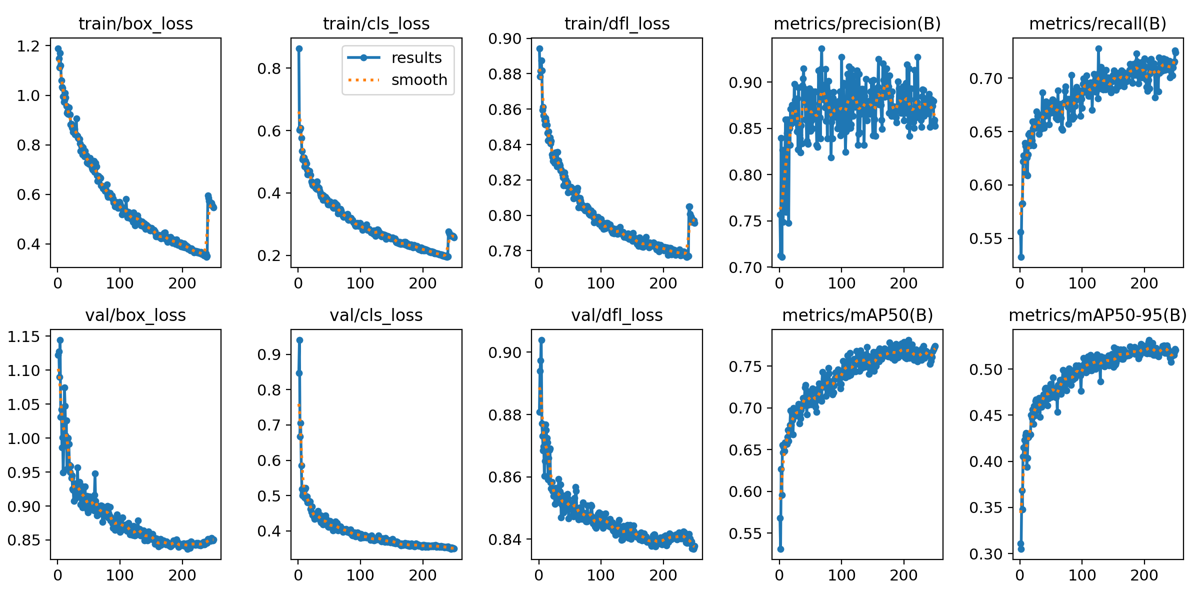

In [3]:
from PIL import Image

path = "./" + str(training_results.save_dir) + "/results.png"
img = Image.open(path)

# Define the resize factor (e.g., 0.5 to reduce the size by half)
resize_factor = 0.5
# Calculate the new size of the image
new_size = (int(img.width * resize_factor), int(img.height * resize_factor))
# Resize the image
img = img.resize(new_size)

img.show()

---
# Validation

# Finetuned model validation

Possible troubleshooting using jupyter notebook: 

> ImportError: libGL.so.1: cannot open shared object file: No such file or directory

Solution: 
> pip uninstall opencv-python

> pip install opencv-python-headless

[Source](https://github.com/ultralytics/ultralytics/issues/1270#issuecomment-1550179877)


In [4]:
from ultralytics import YOLO

# Load the trained model
trained_model_path = str(training_results.save_dir) + "/weights/best.pt"
model = YOLO(trained_model_path) # change the path depending on which model you wish to validate

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /home/malo/notebooks/football-player-detection-with-yolo-fine-tu
                 Class     Images  Instances      Box(P          R      mAP50 


                   all        243       4513       0.85      0.716      0.781      0.534
                player        242       4251      0.951      0.987      0.988      0.773
                  ball        199        262      0.749      0.445      0.574      0.296
Speed: 0.2ms preprocess, 6.6ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val6


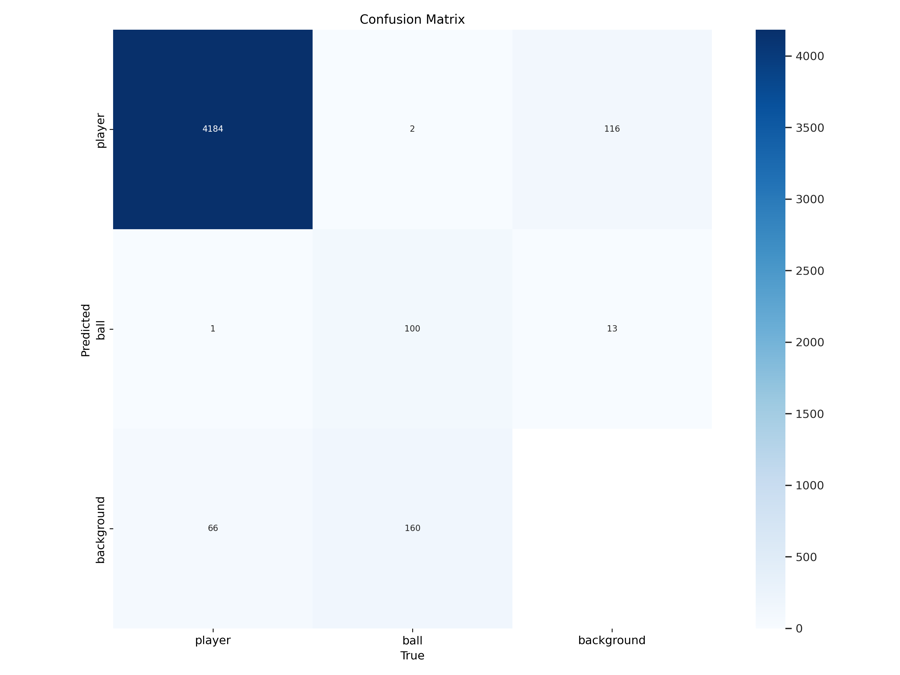

In [5]:
from PIL import Image

# Validate the model
metrics = model.val()

path = "./" + str(metrics.save_dir) + "/confusion_matrix.png"
img = Image.open(path)

# Resize the image
resize_factor = 0.3
new_size = (int(img.width * resize_factor), int(img.height * resize_factor))
img = img.resize(new_size)

img.show()

---
# Testing

In [ ]:
import os
import shutil
import glob

def find_files_with_extension(path, extension):
    """
    Find all files with a specified extension in the given path.

    :param path: The directory path to search in.
    :param extension: The file extension to search for (with or without a leading dot).
    :return: A list of file paths that match the specified extension.
    """
    # Ensure the extension starts with a dot
    if not extension.startswith('.'):
        extension = '.' + extension

    # Use glob to find all files with the specified extension in the given path
    files = glob.glob(os.path.join(path, '*' + extension))

    return files

def empty_or_create_directory(directory):
    """
    Empty the contents of a directory if it exists, or create it if it doesn't.

    :param directory: The path to the directory to be emptied or created.
    """
    if os.path.exists(directory):
        # If the directory exists, empty it
        for filename in os.listdir(directory):
            file_path = os.path.join(directory, filename)
            try:
                if os.path.isfile(file_path) or os.path.islink(file_path):
                    os.unlink(file_path)
                elif os.path.isdir(file_path):
                    shutil.rmtree(file_path)
            except Exception as e:
                print('Failed to delete %s. Reason: %s' % (file_path, e))
    else:
        # If the directory doesn't exist, create it
        os.makedirs(directory)

: 

In [7]:
path = "../datasets/yolo_football/images/test/"
file_ext = ".jpg"

file_list = find_files_with_extension(path, file_ext)

In [8]:
# Run batched inference on a list of images
results = model(file_list, stream=True)  # return a generator of Results objects

results_dir = "./test_results/"
empty_or_create_directory(results_dir)

# Process results generator
for i, result in enumerate(results):
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    # result.show()  # display to screen
    result.save(filename=f"{results_dir}result_{i}.jpg") # save to disk


0: 416x736 15 players, 8.6ms
1: 416x736 21 players, 8.6ms
2: 416x736 25 players, 8.6ms
3: 416x736 25 players, 8.6ms
4: 416x736 8 players, 1 ball, 8.6ms
5: 416x736 15 players, 8.6ms
6: 416x736 17 players, 1 ball, 8.6ms
7: 416x736 22 players, 8.6ms
8: 416x736 14 players, 8.6ms
9: 416x736 16 players, 1 ball, 8.6ms
10: 416x736 25 players, 1 ball, 8.6ms
11: 416x736 12 players, 1 ball, 8.6ms
12: 416x736 1 player, 8.6ms
13: 416x736 14 players, 8.6ms
14: 416x736 20 players, 8.6ms
15: 416x736 10 players, 1 ball, 8.6ms
16: 416x736 20 players, 8.6ms
17: 416x736 25 players, 1 ball, 8.6ms
18: 416x736 22 players, 8.6ms
19: 416x736 24 players, 8.6ms
20: 416x736 19 players, 8.6ms
21: 416x736 23 players, 8.6ms
22: 416x736 16 players, 8.6ms
23: 416x736 18 players, 8.6ms
24: 416x736 24 players, 8.6ms
25: 416x736 7 players, 1 ball, 8.6ms
26: 416x736 25 players, 8.6ms
27: 416x736 24 players, 8.6ms
28: 416x736 15 players, 1 ball, 8.6ms
29: 416x736 21 players, 1 ball, 8.6ms
30: 416x736 16 players, 1 ball, 8

### Display of a random test result image

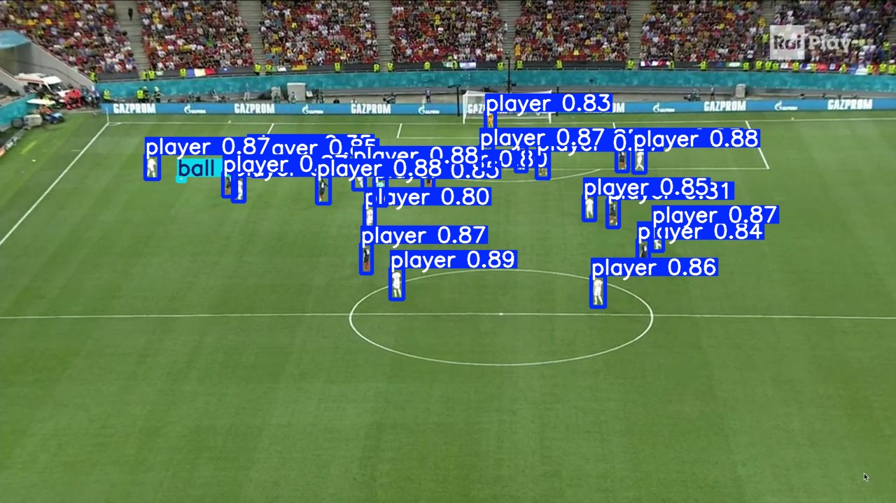

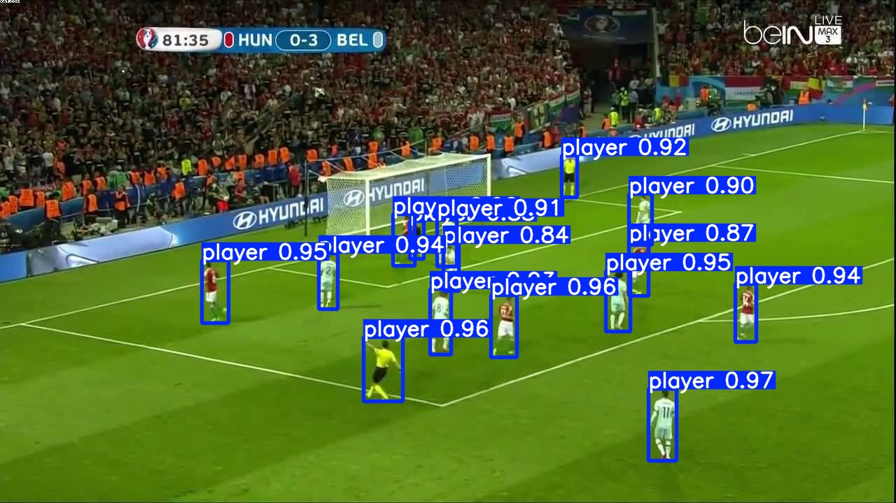

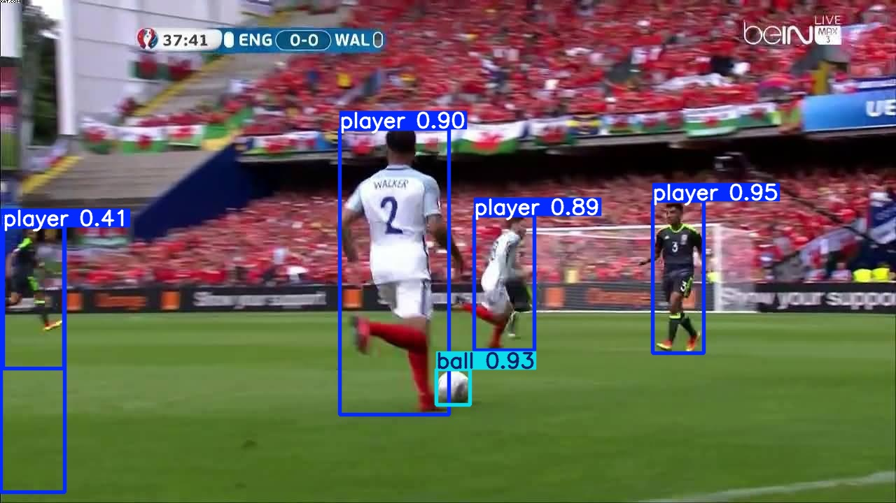

In [9]:
import os
import random
from PIL import Image
from IPython.display import display

def display_random_images(directory, num_images, resize_factor):
    """
    Display a specified number of randomly selected images from a directory with a given resize factor.

    :param directory: The directory path containing the images.
    :param num_images: The number of random images to display.
    :param resize_factor: The factor by which to resize the displayed images.
    """
    # Get a list of all image files in the directory
    image_files = [f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]

    # Check if there are enough images in the directory
    if len(image_files) < num_images:
        print(f"There are only {len(image_files)} images in the directory, but {num_images} were requested.")
        return

    # Choose num_images random image files from the list
    random_image_files = random.sample(image_files, num_images)

    # Display each image with resized display
    for image_file in random_image_files:
        image_path = os.path.join(directory, image_file)
        image = Image.open(image_path)
        # Resize the image
        resized_image = image.resize((int(image.width * resize_factor), int(image.height * resize_factor)))
        display(resized_image)

results_dir = "./test_results/"
display_random_images(results_dir, 3, 0.7)  # Set resize_factor to 0.5 to reduce display size by half


### Video testing

Result displaying is disabled because it is not natively working through notebooks.

In [10]:
source = "../datasets/videos/test_video_1.mp4"
results = model(source, save=True, stream=True, verbose=False, conf=0.35)
for result in results: pass

Results saved to runs/detect/predict4


# Model export

| Format         | `format` Argument | Model                      | Metadata | Arguments                                           |
|----------------|-------------------|----------------------------|----------|-----------------------------------------------------|
| PyTorch        | `-`               | `yolov8n.pt`               | ✅       | `-`                                                 |
| TorchScript    | `torchscript`     | `yolov8n.torchscript`      | ✅       | `imgsz`, `optimize`, `batch`                        |
| ONNX           | `onnx`            | `yolov8n.onnx`             | ✅       | `imgsz`, `half`, `dynamic`, `simplify`, `opset`, `batch` |
| OpenVINO       | `openvino`        | `yolov8n_openvino_model/`  | ✅       | `imgsz`, `half`, `int8`, `batch`                    |
| TensorRT       | `engine`          | `yolov8n.engine`           | ✅       | `imgsz`, `half`, `dynamic`, `simplify`, `workspace`, `int8`, `batch` |
| CoreML         | `coreml`          | `yolov8n.mlpackage`        | ✅       | `imgsz`, `half`, `int8`, `nms`, `batch`             |
| TF SavedModel  | `saved_model`     | `yolov8n_saved_model/`     | ✅       | `imgsz`, `keras`, `int8`, `batch`                   |
| TF GraphDef    | `pb`              | `yolov8n.pb`               | ❌       | `imgsz`, `batch`                                    |
| TF Lite        | `tflite`          | `yolov8n.tflite`           | ✅       | `imgsz`, `half`, `int8`, `batch`                    |
| TF Edge TPU    | `edgetpu`         | `yolov8n_edgetpu.tflite`   | ✅       | `imgsz`                                             |
| TF.js          | `tfjs`            | `yolov8n_web_model/`       | ✅       | `imgsz`, `half`, `int8`, `batch`                    |
| PaddlePaddle   | `paddle`          | `yolov8n_paddle_model/`    | ✅       | `imgsz`, `batch`                                    |
| NCNN           | `ncnn`            | `yolov8n_ncnn_model/`      | ✅       | `imgsz`, `half`, `batch`                            |

More information though [official docs](https://docs.ultralytics.com/modes/export/#arguments)

In [11]:
model.export(format="onnx", dynamic=True)

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Core(TM) i5-14400F)

PyTorch: starting from 'runs/detect/train5/weights/best.pt' with input shape (1, 3, 736, 736) BCHW and output shape(s) (1, 6, 11109) (49.6 MB)

ONNX: starting export with onnx 1.16.2 opset 19...
ONNX: export success ✅ 2.4s, saved as 'runs/detect/train5/weights/best.onnx' (98.7 MB)

Export complete (5.1s)
Results saved to /mnt/c/Users/Malo/Documents/github/football-player-detection-with-yolo-fine-tuning/source/runs/detect/train5/weights
Predict:         yolo predict task=detect model=runs/detect/train5/weights/best.onnx imgsz=736  
Validate:        yolo val task=detect model=runs/detect/train5/weights/best.onnx imgsz=736 data=football_dataset.yaml  
Visualize:       https://netron.app


'runs/detect/train5/weights/best.onnx'